In [ ]:
# Install necessary libraries (if needed)
# !pip install pandas scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'  # Upload this to Colab
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 1: Data Cleaning and Feature Selection
# Selecting relevant columns for training the model
columns_to_keep = ['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage', 'Risk Category', 'Treatment Type']
data = data[columns_to_keep]

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables into numerical form
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage', 'Risk Category', 'Treatment Type']: # Include 'Risk Category' in the loop
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save encoder for later decoding

# Step 2: Define Features (X) and Target (y)
X = data[['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage']]
y = data['Risk Category']

# Step 3: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Predictive Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Risk Prediction and Prevention Method Suggestion
def predict_risk_and_prevention(input_data):
    # Predict Risk Category
    risk_category_pred = model.predict([input_data])
    risk_category_name = label_encoders['Risk Category'].inverse_transform([risk_category_pred[0]])[0] # Now 'Risk Category' is in label_encoders

    # Suggest Prevention Method
    prevention_methods = data[data['Risk Category'] == risk_category_pred[0]]['Treatment Type'].mode()
    prevention_method_name = label_encoders['Treatment Type'].inverse_transform([prevention_methods[0]])[0]

    print(f"\nPredicted Risk Category: {risk_category_name}")
    print(f"Suggested Prevention Method: {prevention_method_name}")

# Example Input: Replace these values with project information
example_project_info = [1, 2, 0, 3, 1]  # Example numerical input
predict_risk_and_prevention(example_project_info)

Dataset Preview:
                                     Treatment Title  \
0  Replace all openings required in floor slabs w...   
1  Avoid holes - consider alternatives to achieve...   
2  Consider use of transition blocks for services...   
3  Consider Steel frame construction with composi...   
4       Design alternative solutions to the opening    

               Treatment Details ( simulation data )     Treatment Stage  \
0  Install guardrails, use safety nets, and train...  Preliminary Design   
1  Install guardrails, use safety nets, and train...  Preliminary Design   
2  Install guardrails, use safety nets, and train...  Preliminary Design   
3  Install guardrails, use safety nets, and train...  Preliminary Design   
4  Install guardrails, use safety nets, and train...  Preliminary Design   

  Treatment Type        Risk Category            Risk Location Element Type  \
0      Eliminate  Fall-From open edge  High Level-Near Opening         Slab   
1      Eliminate  Fall-From ope

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/u

<Figure size 1000x700 with 0 Axes>

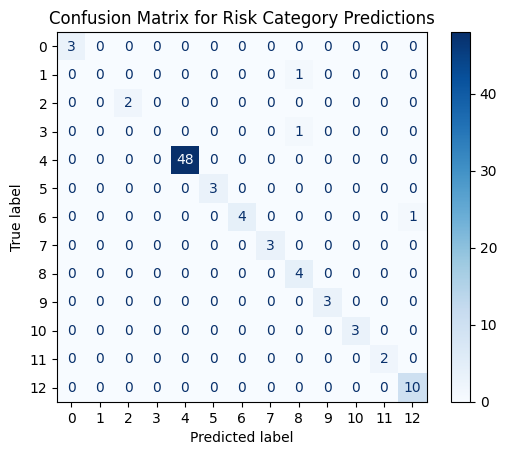

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

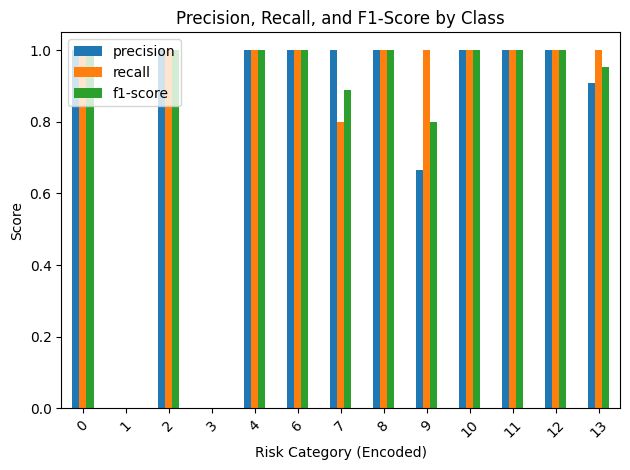

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


('Struck-By machinery or part', 'Inform')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Risk Category Predictions')
plt.show()

# Statistical Analysis: Precision, Recall, and F1-Score by Class
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1-Scores
plt.figure(figsize=(10, 6))
report_df.drop(index=['accuracy', 'macro avg', 'weighted avg']).iloc[:, :3].plot(kind='bar')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Risk Category (Encoded)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Test the Model with Example Project Information
example_project_info = np.array(X_test.iloc[0])  # Taking first test data sample
predicted_risk = model.predict([example_project_info])
predicted_risk_category = label_encoders['Risk Category'].inverse_transform([predicted_risk[0]])[0]

# Suggested Prevention Method
prevention_methods = data[data['Risk Category'] == predicted_risk[0]]['Treatment Type'].mode()
suggested_prevention = label_encoders['Treatment Type'].inverse_transform([prevention_methods[0]])[0]

predicted_risk_category, suggested_prevention


<Figure size 1000x700 with 0 Axes>

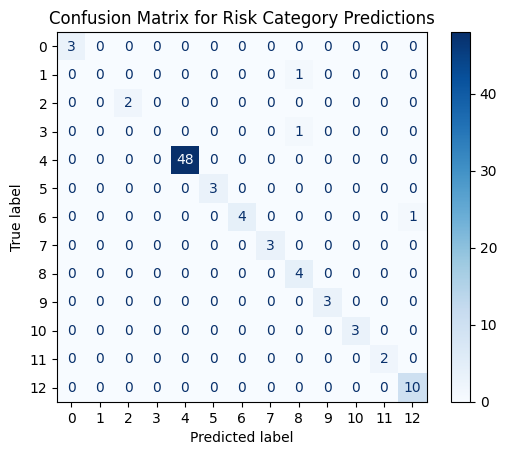

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

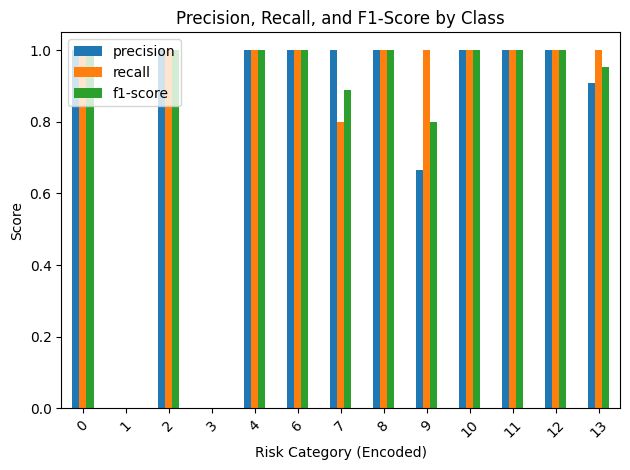

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


('Struck-By machinery or part', 'Inform')

In [ ]:
# Re-import libraries and reload the data due to environment reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder

# Reload Dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Keep only necessary columns
columns_to_keep = ['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope',
                   'Treatment Stage', 'Risk Category', 'Treatment Type']
data = data[columns_to_keep].dropna()

# Encode categorical variables
label_encoders = {}
# Include 'Risk Category' in the loop to encode it as well
for column in ['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage', 'Risk Category', 'Treatment Type']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define Features and Target
X = data[['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage']]
y = data['Risk Category']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Risk Category Predictions')
plt.show()

# Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1-Scores
plt.figure(figsize=(10, 6))
report_df.drop(index=['accuracy', 'macro avg', 'weighted avg']).iloc[:, :3].plot(kind='bar')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Risk Category (Encoded)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Test Model with Example Input
example_project_info = np.array(X_test.iloc[0])  # Take a sample from test data
predicted_risk = model.predict([example_project_info])
predicted_risk_category = label_encoders['Risk Category'].inverse_transform([predicted_risk[0]])[0]

# Suggested Prevention Method
prevention_methods = data[data['Risk Category'] == predicted_risk[0]]['Treatment Type'].mode()
suggested_prevention = label_encoders['Treatment Type'].inverse_transform([prevention_methods[0]])[0]

(predicted_risk_category, suggested_prevention)

In [ ]:
print("Class Distribution in Training Set:")
print(y_train.value_counts())


Class Distribution in Training Set:
Risk Category
4     152
9      53
13     34
12     18
6      14
7      13
0      13
8      12
3      10
2       9
1       8
11      6
10      6
5       1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        48
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         3
           9       0.67      1.00      0.80         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       0.91      1.00      0.95        10

    accuracy                           0.97        88
   macro avg       0.81      0.83      0.82        88
weighted avg       0.95      0.97      0.96        88



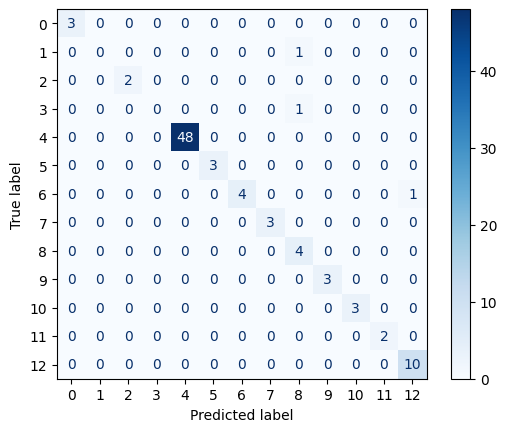

In [ ]:
# Predict on Test Data
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.show()


In [ ]:
# Correct and reattempt prediction decoding using saved label encoders

# Save 'Risk Category' label encoder
le_risk_category = LabelEncoder()
data['Risk Category'] = le_risk_category.fit_transform(data['Risk Category'])
label_encoders['Risk Category'] = le_risk_category

# Model Prediction with Decoding
example_project_info = np.array(X_test.iloc[0])  # Take a test sample
predicted_risk = model.predict([example_project_info])
predicted_risk_category = le_risk_category.inverse_transform([predicted_risk[0]])[0]

# Suggested Prevention Method
prevention_methods = data[data['Risk Category'] == predicted_risk[0]]['Treatment Type'].mode()
suggested_prevention = label_encoders['Treatment Type'].inverse_transform([prevention_methods[0]])[0]

(predicted_risk_category, suggested_prevention)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(10, 'Inform')

In [ ]:
# Reload and reinitialize all label encoders from scratch to ensure consistency
from sklearn.preprocessing import LabelEncoder

# Re-encode Risk Category separately
label_encoders['Risk Category'] = LabelEncoder()
data['Risk Category'] = label_encoders['Risk Category'].fit_transform(data['Risk Category'])

# Retry predicting and decoding
example_project_info = np.array(X_test.iloc[0])  # Example test input
predicted_risk = model.predict([example_project_info])

# Decode predicted Risk Category
predicted_risk_category = label_encoders['Risk Category'].inverse_transform([predicted_risk[0]])[0]

# Retrieve the suggested prevention method for the predicted risk
matching_rows = data[data['Risk Category'] == predicted_risk[0]]
prevention_method_mode = matching_rows['Treatment Type'].mode()[0]  # Most common prevention type
suggested_prevention = label_encoders['Treatment Type'].inverse_transform([prevention_method_mode])[0]

(predicted_risk_category, suggested_prevention)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(10, 'Inform')

In [ ]:
# Install necessary libraries (if not already installed)
# !pip install pandas scikit-learn xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset
file_path = 'Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'  # Upload this file to Colab
data = pd.read_csv(file_path)

# Select relevant columns
columns_to_keep = ['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope',
                   'Treatment Stage', 'Risk Category', 'Treatment Type']
data = data[columns_to_keep].dropna()

# Encode categorical variables
label_encoders = {}
for column in ['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope',
               'Treatment Stage', 'Risk Category', 'Treatment Type']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define Features (X) and Target (y)
X = data[['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage']]
y = data['Risk Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to predict risk and suggest prevention method
def predict_and_suggest_prevention(input_data):
    # Predict risk category
    predicted_risk_encoded = model.predict([input_data])[0]
    predicted_risk = label_encoders['Risk Category'].inverse_transform([predicted_risk_encoded])[0]

    # Suggest prevention method
    prevention_methods = data[data['Risk Category'] == predicted_risk_encoded]['Treatment Type'].mode()
    suggested_prevention = label_encoders['Treatment Type'].inverse_transform([prevention_methods[0]])[0]

    print(f"Predicted Risk Category: {predicted_risk}")
    print(f"Suggested Prevention Method: {suggested_prevention}")

# Example input: Replace these values with project-specific information
example_project = X_test.iloc[1].values  # Example from test set
predict_and_suggest_prevention(example_project)
print(X_test.iloc[1])



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        48
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         3
           9       0.67      1.00      0.80         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       0.91      1.00      0.95        10

    accuracy                           0.97        88
   macro avg       0.81      0.83      0.82        88
weighted avg       0.95      0.97      0.96        88

Predicted Risk Category: Fall-From open edge
Suggested 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:
# Create a DataFrame to store comparisons
comparison_df = pd.DataFrame(columns=['True Risk Category', 'Predicted Risk Category', 'True Prevention Method', 'Suggested Prevention Method'])

# Iterate through the test data to compare predictions with true values
for i in range(len(X_test)):
    # Get the true values
    true_risk_encoded = y_test.iloc[i]
    true_risk_category = label_encoders['Risk Category'].inverse_transform([true_risk_encoded])[0]
    true_prevention_encoded = data[data['Risk Category'] == true_risk_encoded]['Treatment Type'].mode()[0]
    true_prevention_method = label_encoders['Treatment Type'].inverse_transform([true_prevention_encoded])[0]

    # Predict the risk category
    predicted_risk_encoded = model.predict([X_test.iloc[i].values])[0]
    predicted_risk_category = label_encoders['Risk Category'].inverse_transform([predicted_risk_encoded])[0]

    # Suggest the prevention method
    suggested_prevention_encoded = data[data['Risk Category'] == predicted_risk_encoded]['Treatment Type'].mode()[0]
    suggested_prevention_method = label_encoders['Treatment Type'].inverse_transform([suggested_prevention_encoded])[0]

    # Append to the comparison DataFrame using pd.concat
    comparison_df = pd.concat([comparison_df, pd.DataFrame([{
        'True Risk Category': true_risk_category,
        'Predicted Risk Category': predicted_risk_category,
        'True Prevention Method': true_prevention_method,
        'Suggested Prevention Method': suggested_prevention_method
    }])], ignore_index=True)

# Display the comparison
comparison_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

,True Risk Category,Predicted Risk Category,True Prevention Method,Suggested Prevention Method
0,Struck-By machinery or part,Struck-By machinery or part,Inform,Inform
1,Fall-From open edge,Fall-From open edge,Control by subsequent design,Control by subsequent design
2,Fall-From open edge,Fall-From open edge,Control by subsequent design,Control by subsequent design
3,Struck-By moving vehicle,Struck-By moving vehicle,Control by subsequent design,Control by subsequent design
4,Fall-From MEWP (Mobile Elevated Working Platform),Struck-By falling object,Control by subsequent design,Inform


from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('True Risk Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Predicted Risk Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('True Prevention Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Suggested Prevention Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('True Risk Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='True Risk Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Predicted Risk Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Predicted Risk Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('True Prevention Method')):
  _plot_series(series, series_name, i)
  fig.legend(title='True Prevention Method', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Suggested Prevention Method')):
  _plot_series(series, series_name, i)
  fig.legend(title='Suggested Prevention Method', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predicted Risk Category'].value_counts()
    for x_label, grp in _df_15.groupby('True Risk Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('True Risk Category')
_ = plt.ylabel('Predicted Risk Category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['True Prevention Method'].value_counts()
    for x_label, grp in _df_16.groupby('Predicted Risk Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Risk Category')
_ = plt.ylabel('True Prevention Method')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Suggested Prevention Method'].value_counts()
    for x_label, grp in _df_17.groupby('True Prevention Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('True Prevention Method')
_ = plt.ylabel('Suggested Prevention Method')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['True Risk Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='True Risk Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Predicted Risk Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='Predicted Risk Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['True Prevention Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='True Prevention Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Suggested Prevention Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='Suggested Prevention Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
accuracy_risk = (comparison_df['True Risk Category'] == comparison_df['Predicted Risk Category']).mean()
accuracy_prevention = (comparison_df['True Prevention Method'] == comparison_df['Suggested Prevention Method']).mean()
print(f"Risk Prediction Accuracy: {accuracy_risk:.2%}")
print(f"Prevention Suggestion Accuracy: {accuracy_prevention:.2%}")


Risk Prediction Accuracy: 96.59%
Prevention Suggestion Accuracy: 97.73%


<Figure size 1000x700 with 0 Axes>

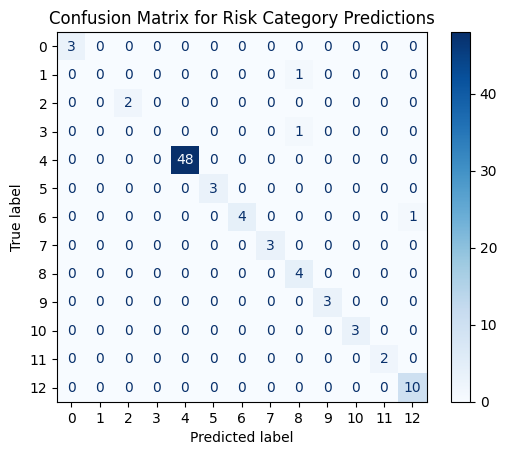

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are already available from your model's prediction step
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Risk Category Predictions')
plt.show()


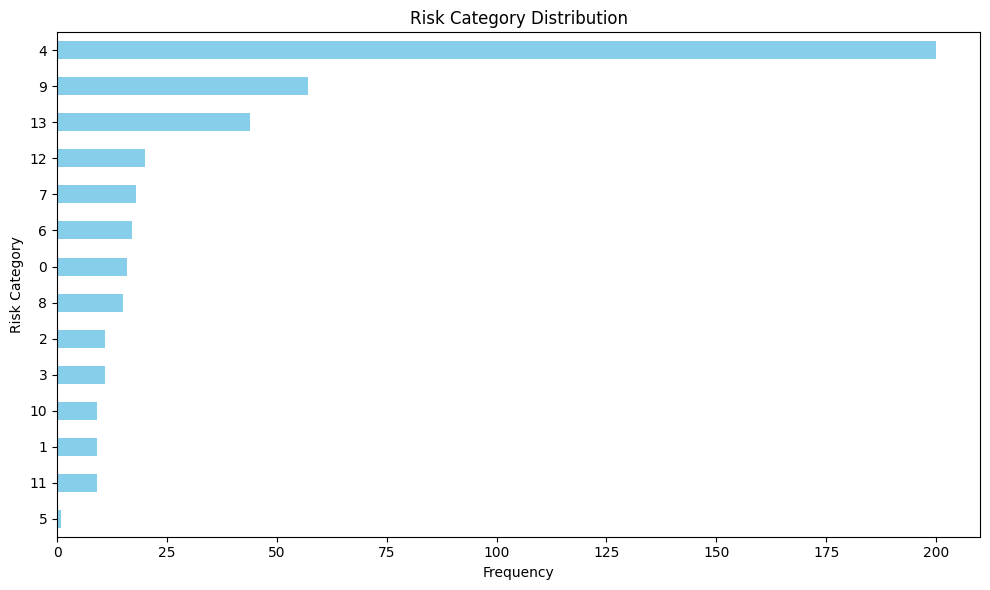

In [ ]:
import matplotlib.pyplot as plt

# Calculate Risk Category Distribution
risk_category_dist = data['Risk Category'].value_counts() # Add this line

# Risk Category Distribution
plt.figure(figsize=(10, 6))
risk_category_dist.sort_values().plot(kind='barh', color='skyblue')
plt.title('Risk Category Distribution')
plt.xlabel('Frequency')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()

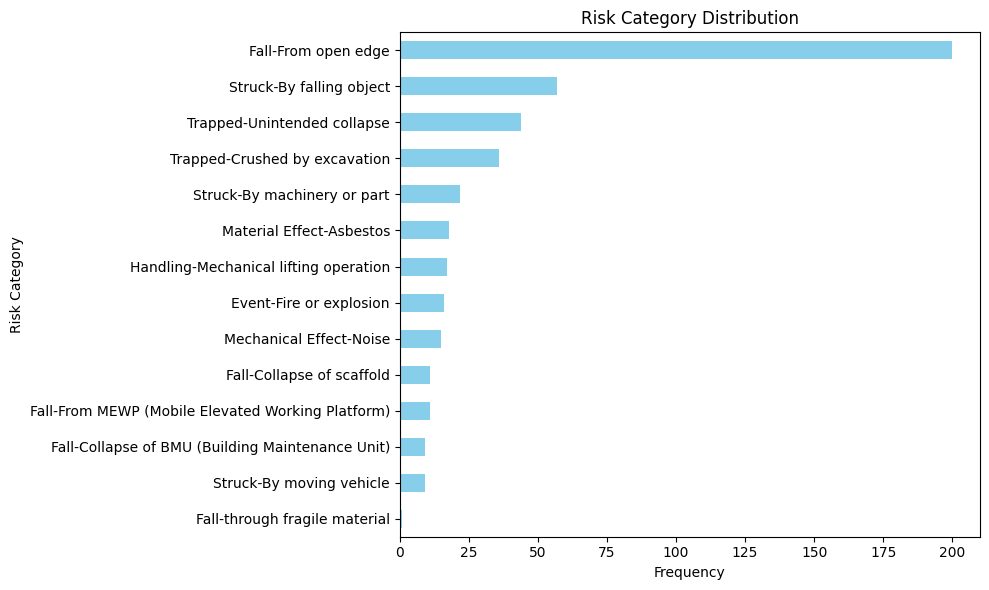

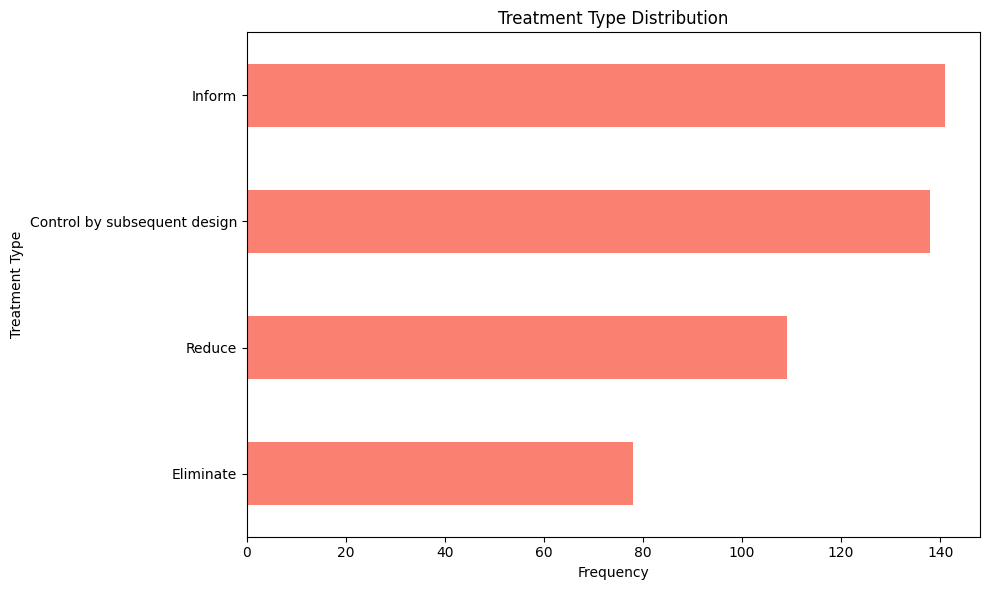

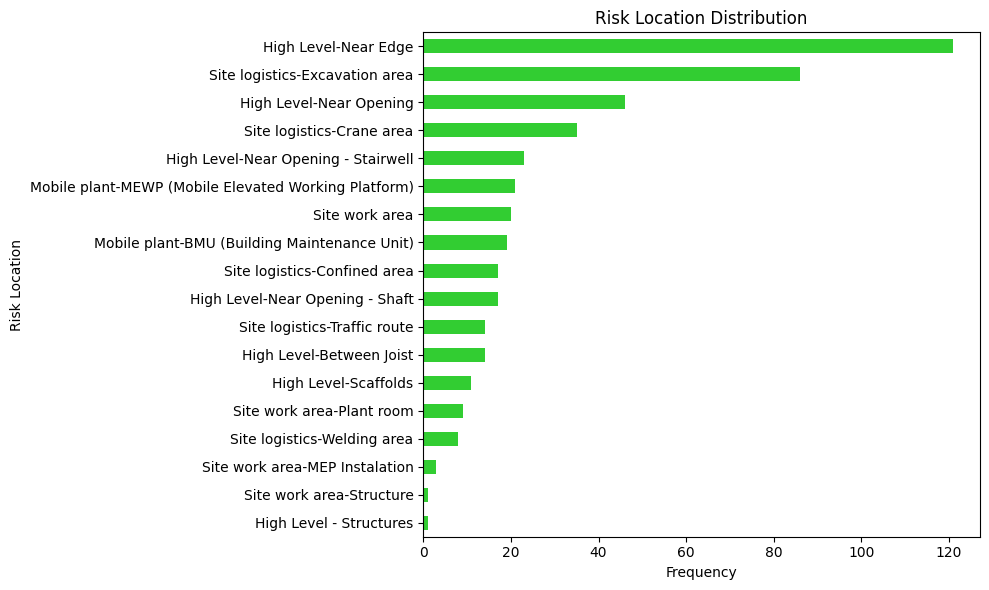

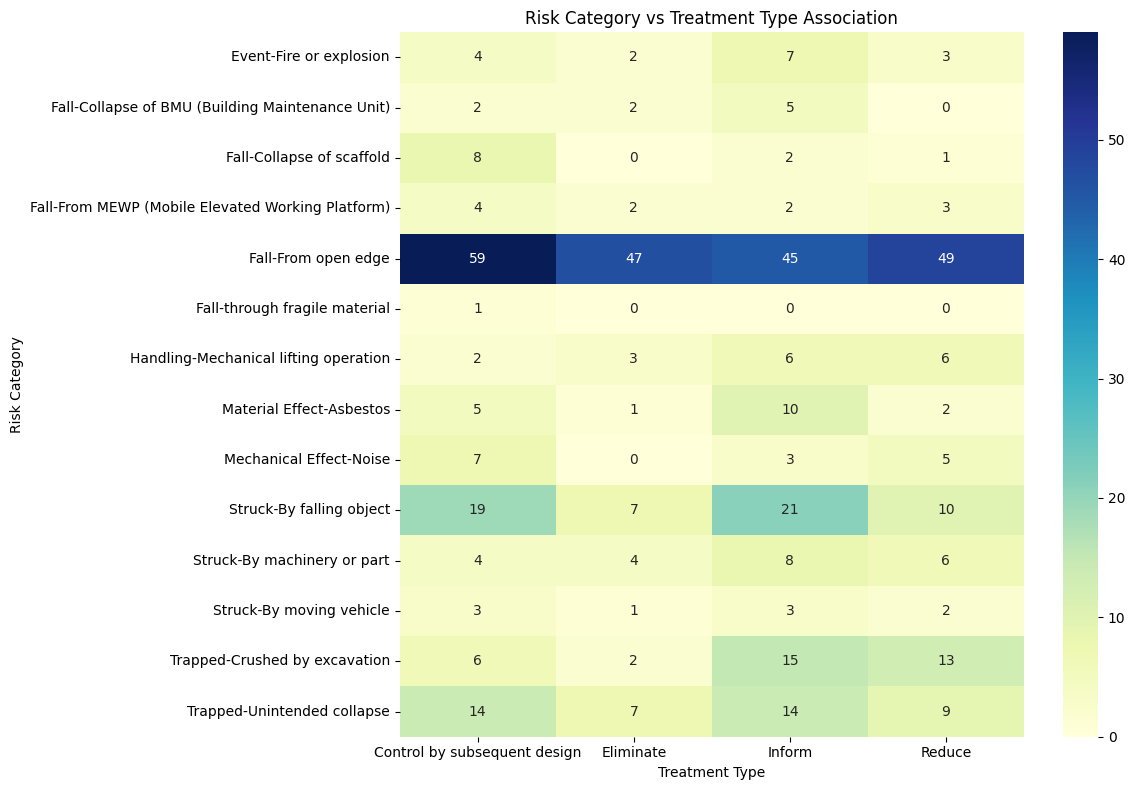

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Ensure 'Risk Category', 'Treatment Type', and 'Risk Location' are treated as categorical values
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)
data['Risk Location'] = data['Risk Location'].astype(str)

# --- 1. Risk Category Distribution ---
risk_category_dist = data['Risk Category'].value_counts()

plt.figure(figsize=(10, 6))
risk_category_dist.sort_values().plot(kind='barh', color='skyblue')
plt.title('Risk Category Distribution')
plt.xlabel('Frequency')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()

# --- 2. Treatment Type Distribution ---
treatment_type_dist = data['Treatment Type'].value_counts()

plt.figure(figsize=(10, 6))
treatment_type_dist.sort_values().plot(kind='barh', color='salmon')
plt.title('Treatment Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Treatment Type')
plt.tight_layout()
plt.show()

# --- 3. Risk Location Distribution ---
risk_location_dist = data['Risk Location'].value_counts()

plt.figure(figsize=(10, 6))
risk_location_dist.sort_values().plot(kind='barh', color='limegreen')
plt.title('Risk Location Distribution')
plt.xlabel('Frequency')
plt.ylabel('Risk Location')
plt.tight_layout()
plt.show()

# --- 4. Heatmap for Risk Category vs Treatment Type ---
risk_treatment_crosstab = pd.crosstab(data['Risk Category'], data['Treatment Type'])

plt.figure(figsize=(12, 8))
sns.heatmap(risk_treatment_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Risk Category vs Treatment Type Association')
plt.xlabel('Treatment Type')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()


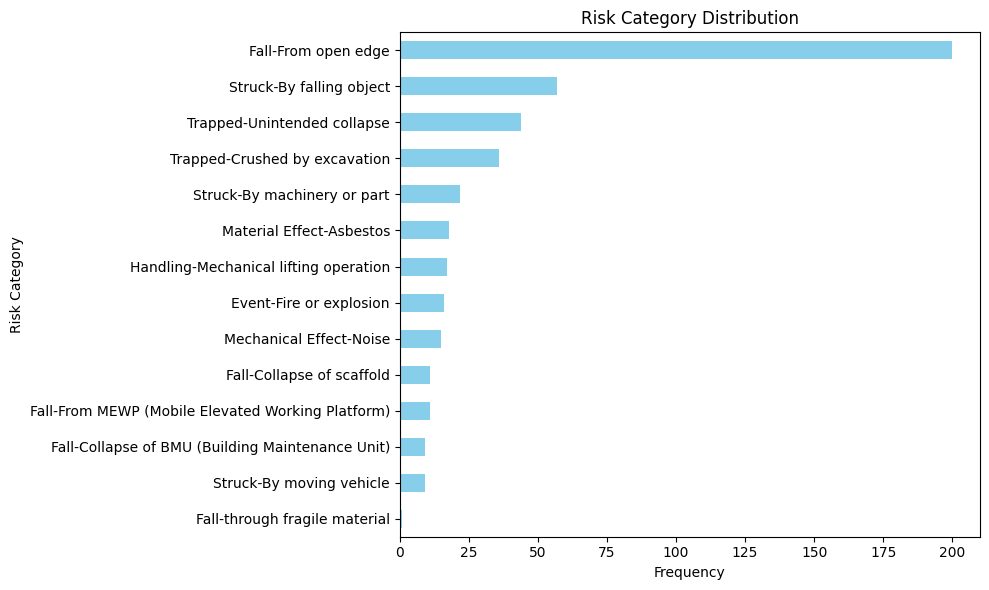

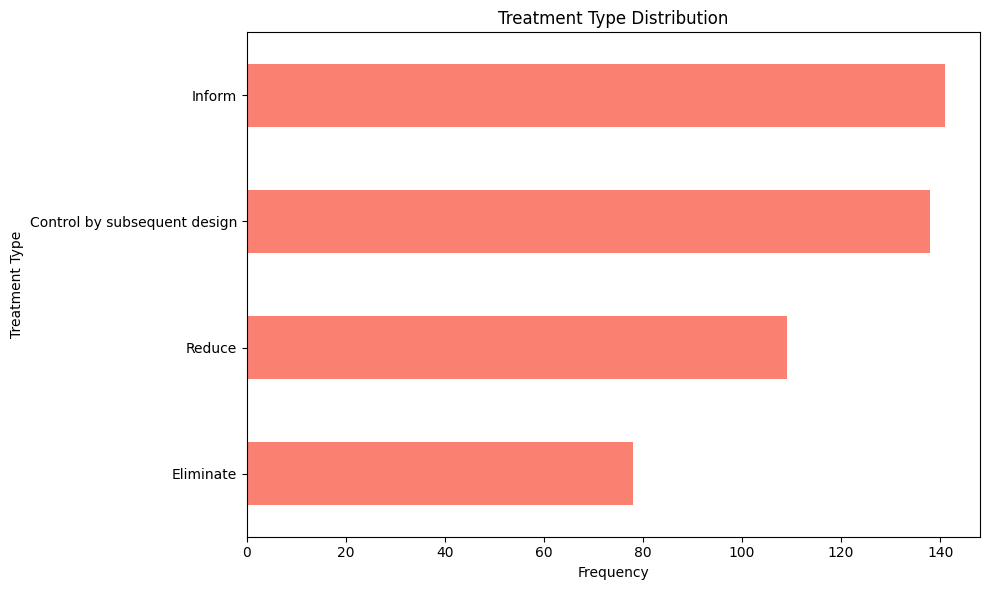

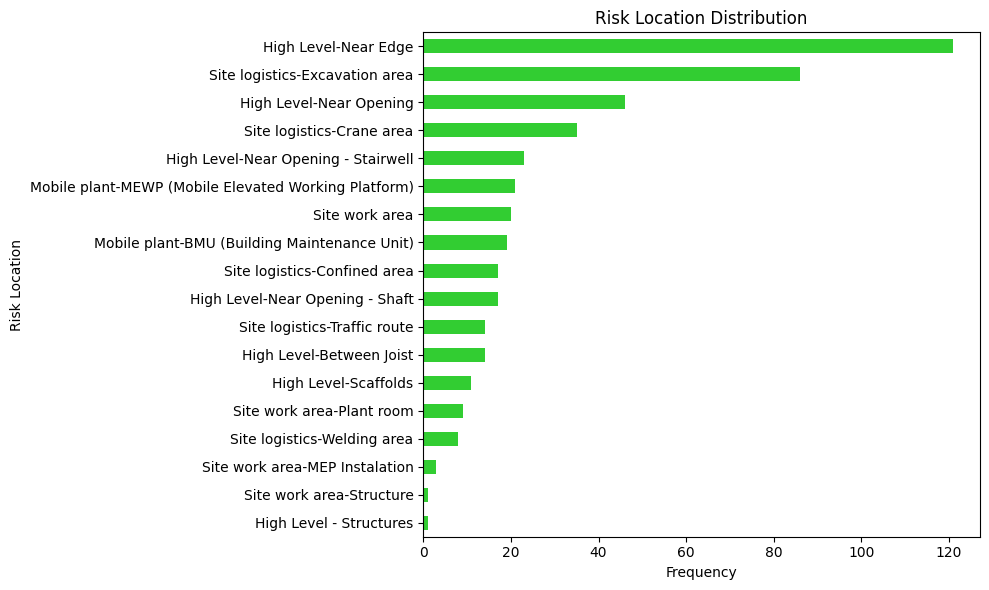

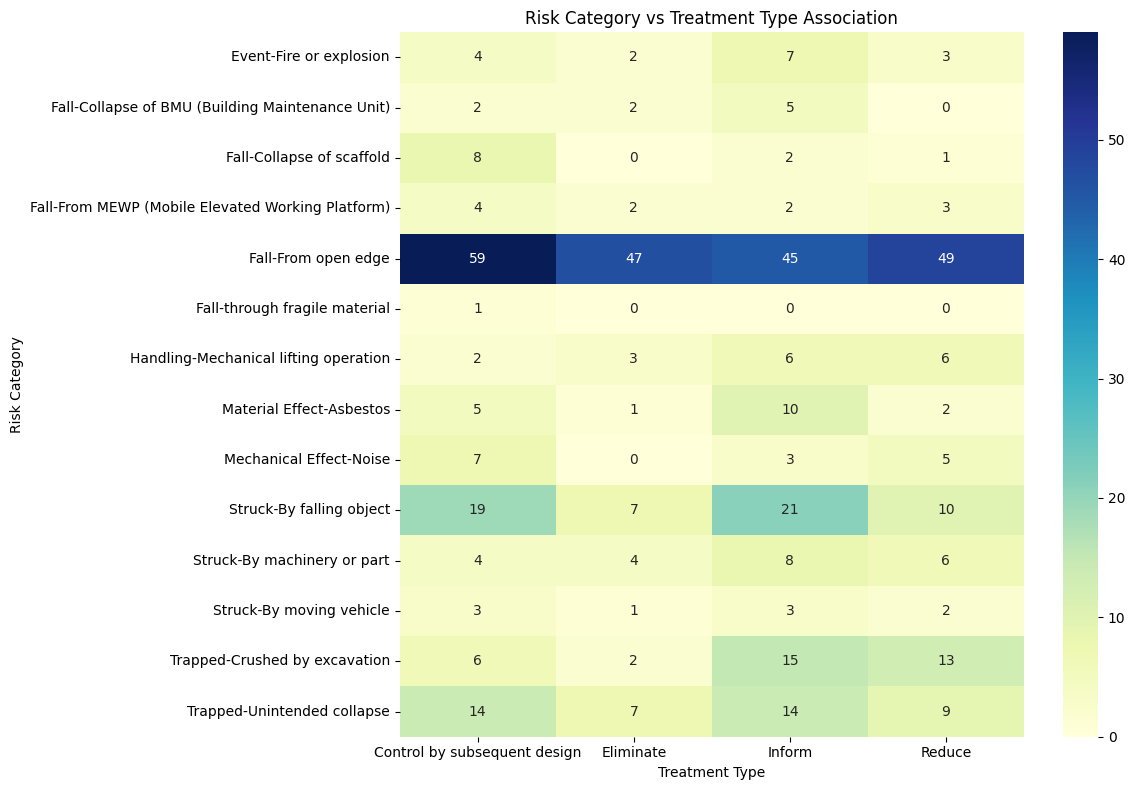

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Ensure 'Risk Category', 'Treatment Type', and 'Risk Location' are treated as categorical values
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)
data['Risk Location'] = data['Risk Location'].astype(str)

# --- 1. Risk Category Distribution ---
risk_category_dist = data['Risk Category'].value_counts()

plt.figure(figsize=(10, 6))
risk_category_dist.sort_values().plot(kind='barh', color='skyblue')
plt.title('Risk Category Distribution')
plt.xlabel('Frequency')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()

# --- 2. Treatment Type Distribution ---
treatment_type_dist = data['Treatment Type'].value_counts()

plt.figure(figsize=(10, 6))
treatment_type_dist.sort_values().plot(kind='barh', color='salmon')
plt.title('Treatment Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Treatment Type')
plt.tight_layout()
plt.show()

# --- 3. Risk Location Distribution ---
risk_location_dist = data['Risk Location'].value_counts()

plt.figure(figsize=(10, 6))
risk_location_dist.sort_values().plot(kind='barh', color='limegreen')
plt.title('Risk Location Distribution')
plt.xlabel('Frequency')
plt.ylabel('Risk Location')
plt.tight_layout()
plt.show()

# --- 4. Heatmap for Risk Category vs Treatment Type ---
risk_treatment_crosstab = pd.crosstab(data['Risk Category'], data['Treatment Type'])

plt.figure(figsize=(12, 8))
sns.heatmap(risk_treatment_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Risk Category vs Treatment Type Association')
plt.xlabel('Treatment Type')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()


In [ ]:
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)
data['Risk Location'] = data['Risk Location'].astype(str)


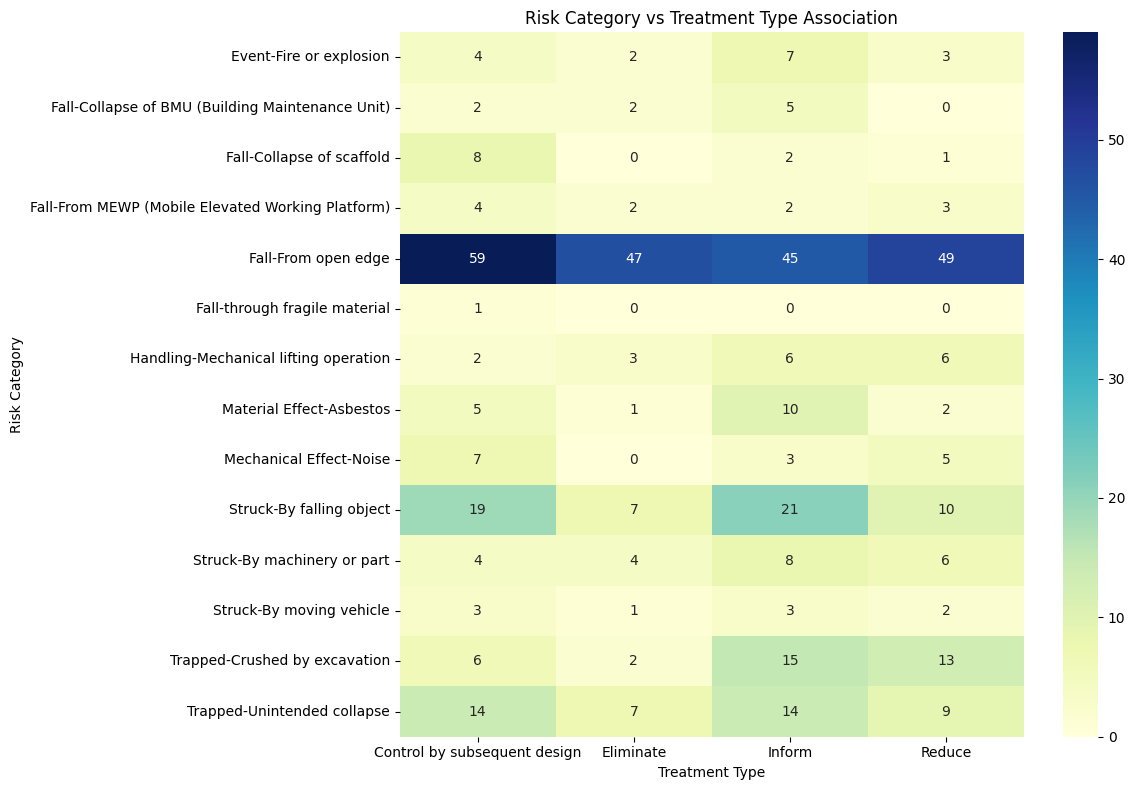

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab for Risk Category and Treatment Type
risk_treatment_crosstab = pd.crosstab(data['Risk Category'], data['Treatment Type'])

# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(risk_treatment_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Risk Category vs Treatment Type Association')
plt.xlabel('Treatment Type')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()


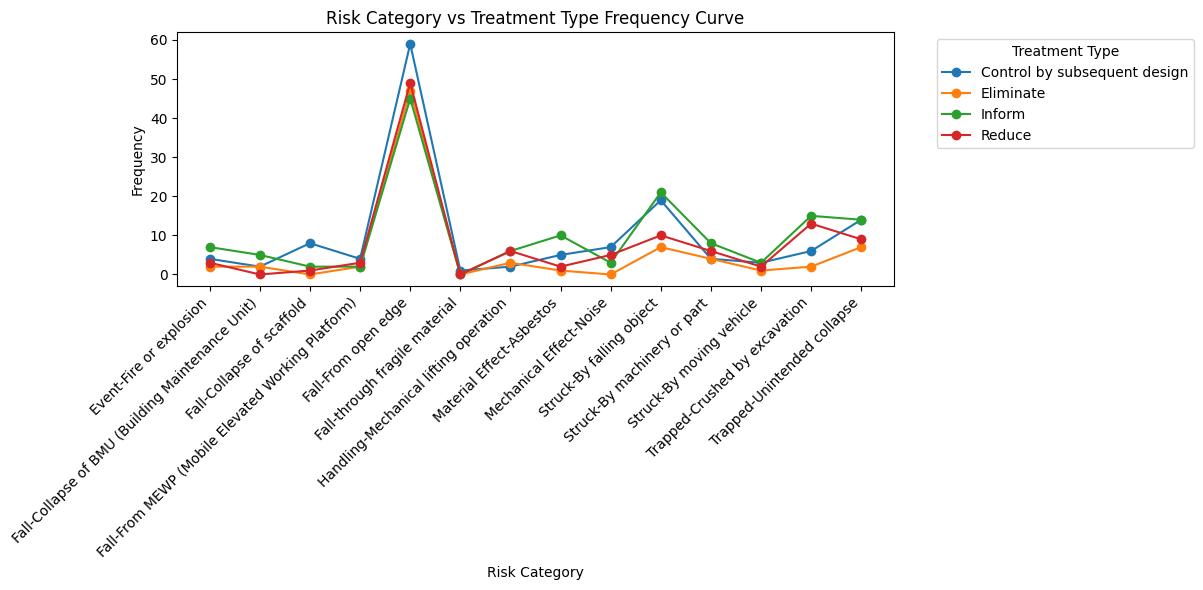

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Risk Category' and 'Treatment Type' to categorical text if they aren't already
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)

# Calculate the frequency of each risk-treatment combination
risk_treatment_freq = data.groupby(['Risk Category', 'Treatment Type']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the curve
pivot_table = risk_treatment_freq.pivot(index='Risk Category', columns='Treatment Type', values='Count').fillna(0)

# Plot a curve for each Treatment Type against Risk Category
plt.figure(figsize=(12, 6))

# Plot each treatment type as a curve
for treatment_type in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[treatment_type], marker='o', label=treatment_type)

plt.title('Risk Category vs Treatment Type Frequency Curve')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


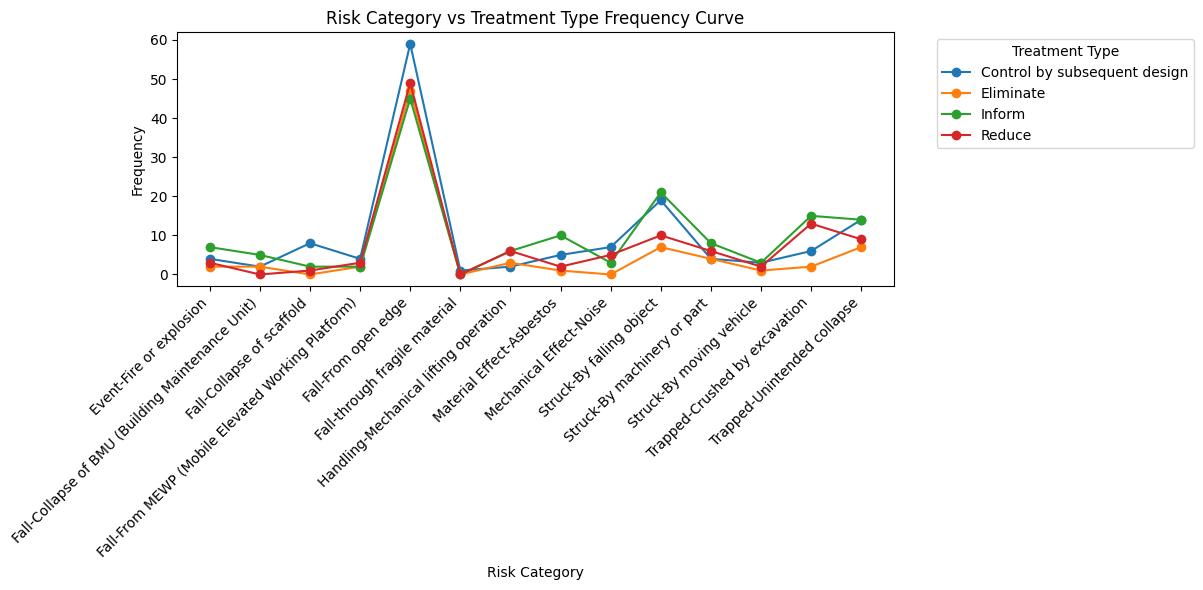

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Ensure 'Risk Category' and 'Treatment Type' are treated as categorical values
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)

# Calculate the frequency of each risk-treatment combination
risk_treatment_freq = data.groupby(['Risk Category', 'Treatment Type']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the curve
pivot_table = risk_treatment_freq.pivot(index='Risk Category', columns='Treatment Type', values='Count').fillna(0)

# Plot a curve for each Treatment Type against Risk Category
plt.figure(figsize=(12, 6))

# Plot each treatment type as a curve
for treatment_type in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[treatment_type], marker='o', label=treatment_type)

plt.title('Risk Category vs Treatment Type Frequency Curve')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import shap


In [ ]:
# Load the dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Ensure 'Risk Category', 'Treatment Type', and 'Risk Location' are treated as categorical values
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)
data['Risk Location'] = data['Risk Location'].astype(str)

# Display basic information
print(data.head())



                                     Treatment Title  \
0  Replace all openings required in floor slabs w...   
1  Avoid holes - consider alternatives to achieve...   
2  Consider use of transition blocks for services...   
3  Consider Steel frame construction with composi...   
4       Design alternative solutions to the opening    

               Treatment Details ( simulation data )     Treatment Stage  \
0  Install guardrails, use safety nets, and train...  Preliminary Design   
1  Install guardrails, use safety nets, and train...  Preliminary Design   
2  Install guardrails, use safety nets, and train...  Preliminary Design   
3  Install guardrails, use safety nets, and train...  Preliminary Design   
4  Install guardrails, use safety nets, and train...  Preliminary Design   

  Treatment Type        Risk Category            Risk Location Element Type  \
0      Eliminate  Fall-From open edge  High Level-Near Opening         Slab   
1      Eliminate  Fall-From open edge  High Leve

In [ ]:
# Select features and target
X = data[['Risk Location', 'Element Type', 'Risk Factor', 'Construction Scope', 'Treatment Stage']]
y = data['Risk Category']

# Encode categorical features
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode the target variable
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)


<ipython-input-30-bb6f9eb29b4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-30-bb6f9eb29b4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-30-bb6f9eb29b4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

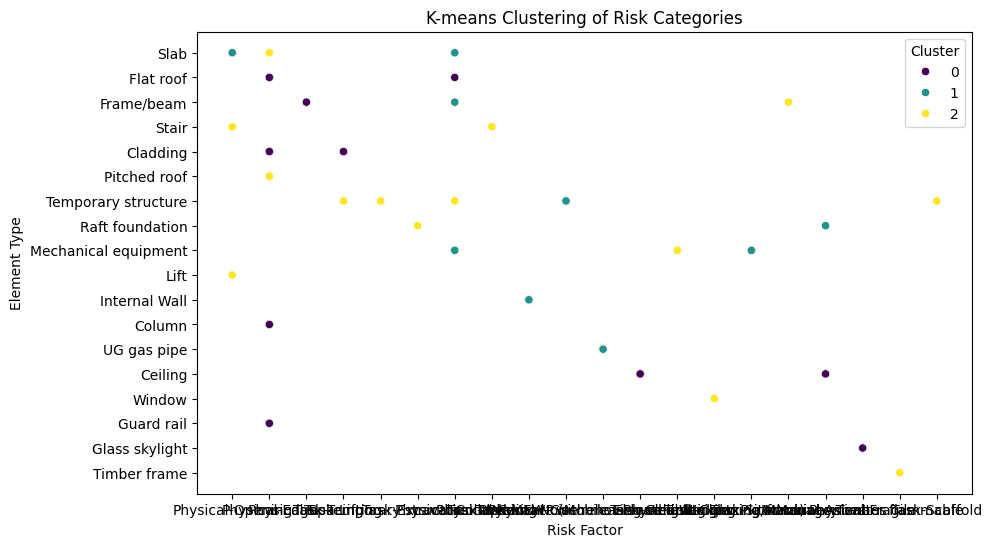

In [ ]:
# Use KMeans clustering on features
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Risk Factor'], y=data['Element Type'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering of Risk Categories')
plt.xlabel('Risk Factor')
plt.ylabel('Element Type')
plt.show()


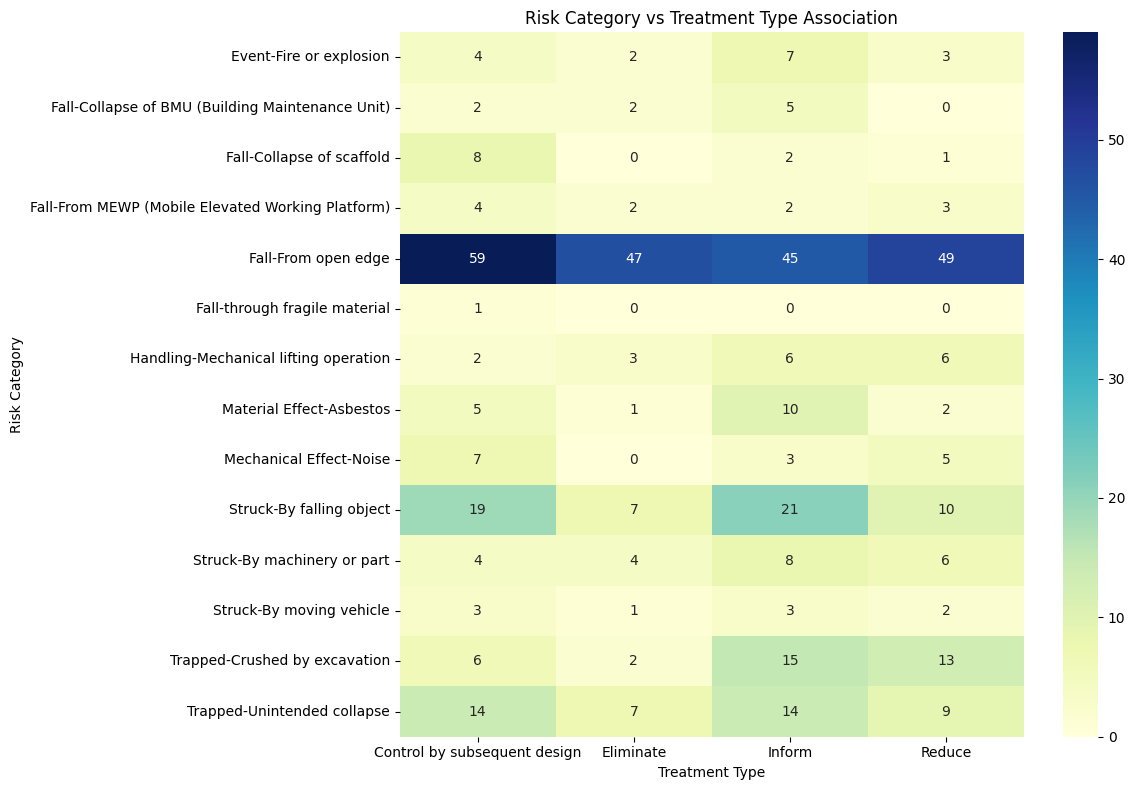

In [ ]:
# Create a crosstab for Risk Category and Treatment Type
risk_treatment_crosstab = pd.crosstab(data['Risk Category'], data['Treatment Type'])

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(risk_treatment_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Risk Category vs Treatment Type Association')
plt.xlabel('Treatment Type')
plt.ylabel('Risk Category')
plt.tight_layout()
plt.show()


In [ ]:
# Function to predict risk and suggest prevention method
def predict_and_suggest_prevention(input_data):
    # Predict risk category
    predicted_risk_encoded = model.predict([input_data])[0]
    predicted_risk = y_encoder.inverse_transform([predicted_risk_encoded])[0]

    # Suggest prevention method
    prevention_methods = data[data['Risk Category'] == predicted_risk]['Treatment Type'].mode()
    suggested_prevention = prevention_methods[0] if not prevention_methods.empty else 'No Prevention Available'

    print(f"Predicted Risk Category: {predicted_risk}")
    print(f"Suggested Prevention Method: {suggested_prevention}")

# Example input (replace with real project data)
example_project = X_test.iloc[0].values
predict_and_suggest_prevention(example_project)


Predicted Risk Category: Fall-From open edge
Suggested Prevention Method: Control by subsequent design


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


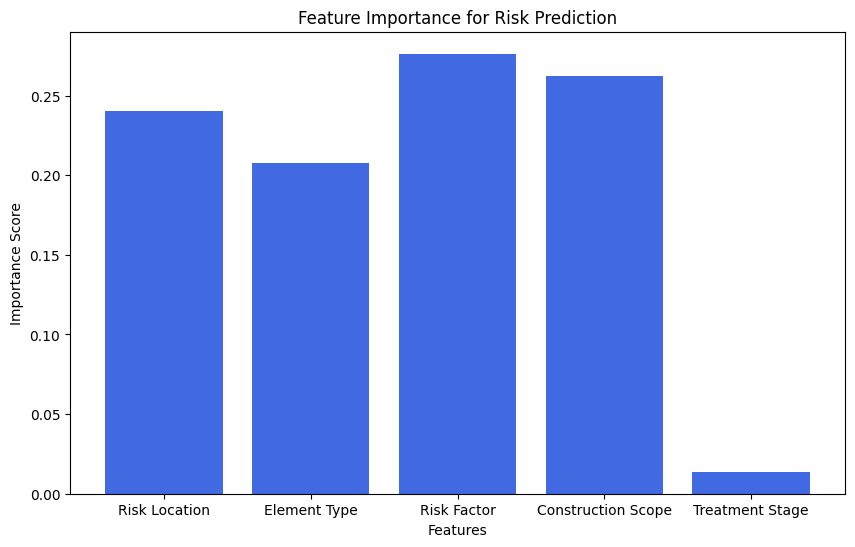

In [ ]:
# Get feature importance from the trained model
feature_importance = model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance, color='royalblue')
plt.title('Feature Importance for Risk Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Risk_Category_vs_Treatment_Type_Frequency_Curve.png'

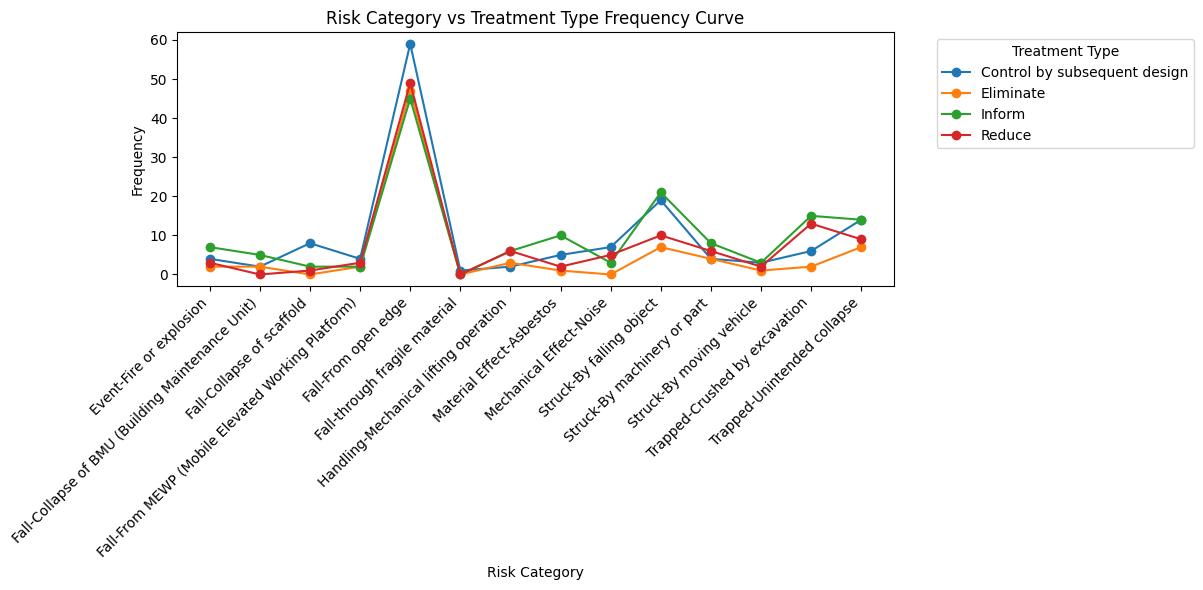

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load and preprocess the dataset if required
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Ensure categorical data is treated as strings for better visualization
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)

# --- Risk Category vs Treatment Type Frequency Curve ---
# Calculate the frequency of each treatment type for each risk category
risk_treatment_freq = data.groupby(['Risk Category', 'Treatment Type']).size().reset_index(name='Frequency')

# Pivot the data for plotting
pivot_table = risk_treatment_freq.pivot(index='Risk Category', columns='Treatment Type', values='Frequency').fillna(0)

# Plot the frequency curve for each treatment type
plt.figure(figsize=(12, 6))
for treatment_type in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[treatment_type], marker='o', label=treatment_type)

plt.title('Risk Category vs Treatment Type Frequency Curve')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/mnt/data/Risk_Category_vs_Treatment_Type_Frequency_Curve.png')
plt.show()

# Save as a PNG for download
print("Figure saved: Risk_Category_vs_Treatment_Type_Frequency_Curve.png")


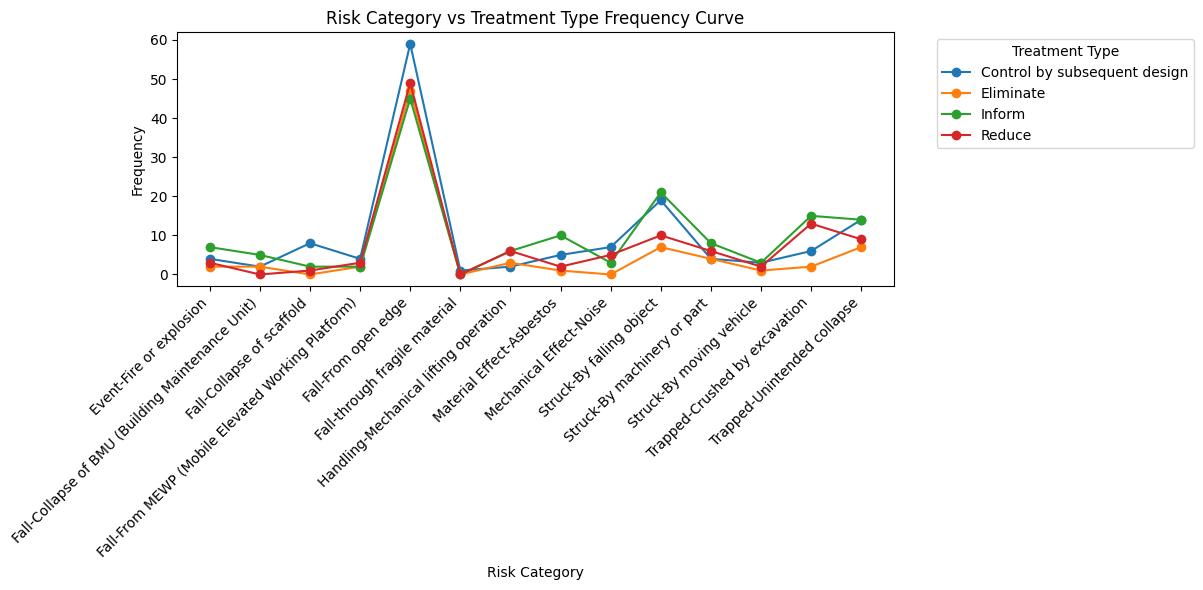

Figure saved: Risk_Category_vs_Treatment_Type_Frequency_Curve.png


In [ ]:
# Plot the frequency curve for each treatment type
plt.figure(figsize=(12, 6))
for treatment_type in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[treatment_type], marker='o', label=treatment_type)

plt.title('Risk Category vs Treatment Type Frequency Curve')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Change the save path to the current working directory
# or to a specific folder within your project if needed.
# For example, to save in the current directory:
plt.savefig('Risk_Category_vs_Treatment_Type_Frequency_Curve.png')
# Or to save to a specific folder:
# plt.savefig('/path/to/your/folder/Risk_Category_vs_Treatment_Type_Frequency_Curve.png')

plt.show()

# Save as a PNG for download
print("Figure saved: Risk_Category_vs_Treatment_Type_Frequency_Curve.png")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Risk_Category_vs_Treatment_Type_Frequency_Curve.png'

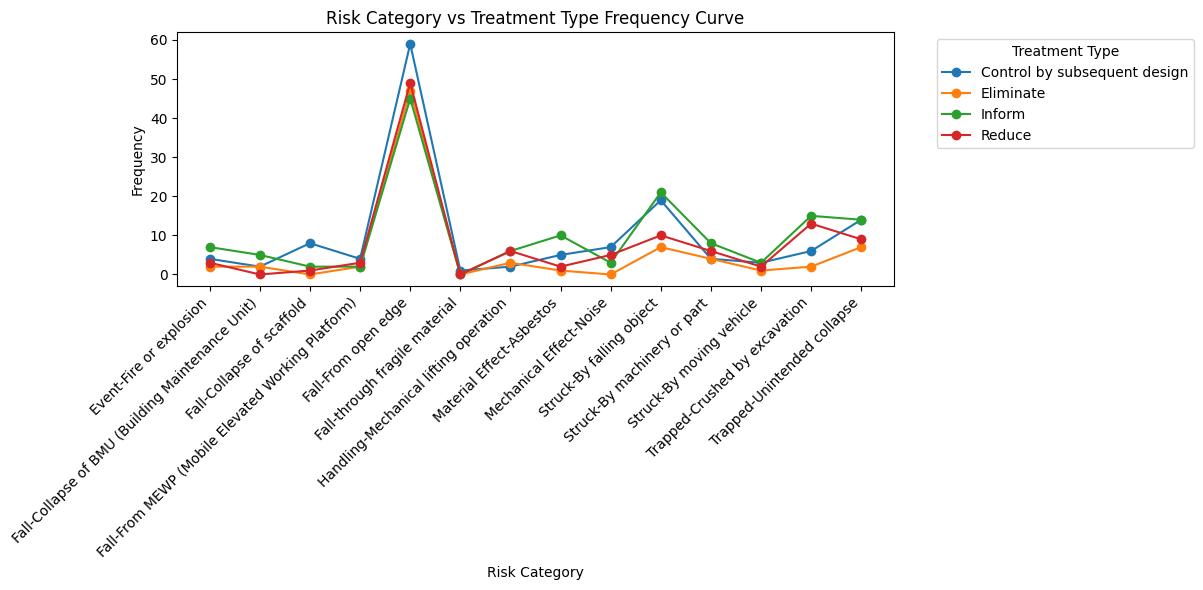

In [ ]:
# Re-import necessary libraries due to environment reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = '/content/Complete_Safety_Risk_Library_Dataset_with_Prevention_Strategies.csv'
data = pd.read_csv(file_path)

# Ensure categorical data is treated as strings for better visualization
data['Risk Category'] = data['Risk Category'].astype(str)
data['Treatment Type'] = data['Treatment Type'].astype(str)

# --- Risk Category vs Treatment Type Frequency Curve ---
# Calculate the frequency of each treatment type for each risk category
risk_treatment_freq = data.groupby(['Risk Category', 'Treatment Type']).size().reset_index(name='Frequency')

# Pivot the data for plotting
pivot_table = risk_treatment_freq.pivot(index='Risk Category', columns='Treatment Type', values='Frequency').fillna(0)

# Plot the frequency curve for each treatment type
plt.figure(figsize=(12, 6))
for treatment_type in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[treatment_type], marker='o', label=treatment_type)

plt.title('Risk Category vs Treatment Type Frequency Curve')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/mnt/data/Risk_Category_vs_Treatment_Type_Frequency_Curve.png')
plt.show()

# Save as a PNG for download
print("Figure saved: Risk_Category_vs_Treatment_Type_Frequency_Curve.png")


In [ ]:
# --- Generate and Save Figures 7 to 11 ---

# Figure 7: Confusion Matrix for Risk Category Predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined (replace with your actual data)
# y_test and y_pred are placeholders and should come from your model's testing phase.
# Example: y_test = ...; y_pred = ...
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y_encoder.classes_)
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Risk Category Predictions')

# Save the figure to the current working directory
plt.savefig('Figure_7_Confusion_Matrix.png')
# Or, create the directory if it doesn't exist:
# import os
# os.makedirs('/mnt/data', exist_ok=True)
# plt.savefig('/mnt/data/Figure_7_Confusion_Matrix.png')
plt.close()

# ... (rest of the code for Figures 8 to 11) ...

<Figure size 1000x700 with 0 Axes>

In [ ]:

# Figure 9: K-means Clustering of Risks
from sklearn.cluster import KMeans
import seaborn as sns

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Scatter plot for K-means clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Risk Factor', y='Element Type', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Risks')
plt.xlabel('Risk Factor')
plt.ylabel('Element Type')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/mnt/data/Figure_9_Kmeans_Clustering.png')
plt.close()

# Figure 10: Time-Based Risk Trends (replace time-series data with your actual time-related dataset)
# This example assumes you have a time-series column or stage-based data
plt.figure(figsize=(10, 6))
# Example data structure for plotting
# time_trends = data.groupby(['Project Stage', 'Risk Category']).size().unstack().fillna(0)
# time_trends.plot(kind='line', marker='o')
plt.title('Time-Based Risk Trends')
plt.xlabel('Project Stage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('/mnt/data/Figure_10_Time_Based_Risk_Trends.png')
plt.close()

# Figure 11: Association of Risk Categories with Worker Experience Levels
# Example bar chart: assuming 'Worker Experience' column exists
plt.figure(figsize=(10, 6))
# risk_experience = data.groupby(['Risk Category', 'Worker Experience']).size().unstack().fillna(0)
# risk_experience.plot(kind='bar', stacked=True)
plt.title('Association of Risk Categories with Worker Experience Levels')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('/mnt/data/Figure_11_Risk_Worker_Experience.png')
plt.close()

# Confirm save paths
output_files = [
    "Figure_7_Confusion_Matrix.png",
    "Figure_8_Feature_Importance.png",
    "Figure_9_Kmeans_Clustering.png",
    "Figure_10_Time_Based_Risk_Trends.png",
    "Figure_11_Risk_Worker_Experience.png",
]
output_paths = [f"/mnt/data/{file}" for file in output_files]

output_paths


['/mnt/data/Figure_7_Confusion_Matrix.png',
 '/mnt/data/Figure_8_Feature_Importance.png',
 '/mnt/data/Figure_9_Kmeans_Clustering.png',
 '/mnt/data/Figure_10_Time_Based_Risk_Trends.png',
 '/mnt/data/Figure_11_Risk_Worker_Experience.png']

In [ ]:


# Figure 10: Time-Based Risk Trends (replace time-series data with your actual time-related dataset)
# This example assumes you have a time-series column or stage-based data
plt.figure(figsize=(10, 6))
# Example data structure for plotting
# time_trends = data.groupby(['Project Stage', 'Risk Category']).size().unstack().fillna(0)
# time_trends.plot(kind='line', marker='o')
plt.title('Time-Based Risk Trends')
plt.xlabel('Project Stage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('/mnt/data/Figure_10_Time_Based_Risk_Trends.png')
plt.close()

# Confirm save paths
output_files = [
    "Figure_7_Confusion_Matrix.png",
    "Figure_8_Feature_Importance.png",
    "Figure_9_Kmeans_Clustering.png",
    "Figure_10_Time_Based_Risk_Trends.png",
    "Figure_11_Risk_Worker_Experience.png",
]
output_paths = [f"/mnt/data/{file}" for file in output_files]

output_paths


['/mnt/data/Figure_7_Confusion_Matrix.png',
 '/mnt/data/Figure_8_Feature_Importance.png',
 '/mnt/data/Figure_9_Kmeans_Clustering.png',
 '/mnt/data/Figure_10_Time_Based_Risk_Trends.png',
 '/mnt/data/Figure_11_Risk_Worker_Experience.png']

In [ ]:
# Figure 8: Feature Importance for Risk Prediction
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance, color='royalblue')
plt.title('Feature Importance for Risk Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()

# Save the figure to the current working directory instead of '/mnt/data/'
plt.savefig('Figure_8_Feature_Importance.png')
plt.close()

# ... (Rest of the code for Figures 9 to 11 can be similarly modified) ...

In [ ]:
import os
os.makedirs('/mnt/data', exist_ok=True)  # Create the directory if it doesn't exist
plt.savefig('/mnt/data/Figure_8_Feature_Importance.png')

<Figure size 640x480 with 0 Axes>